In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Text(0.5, 1.0, 'All Channels')

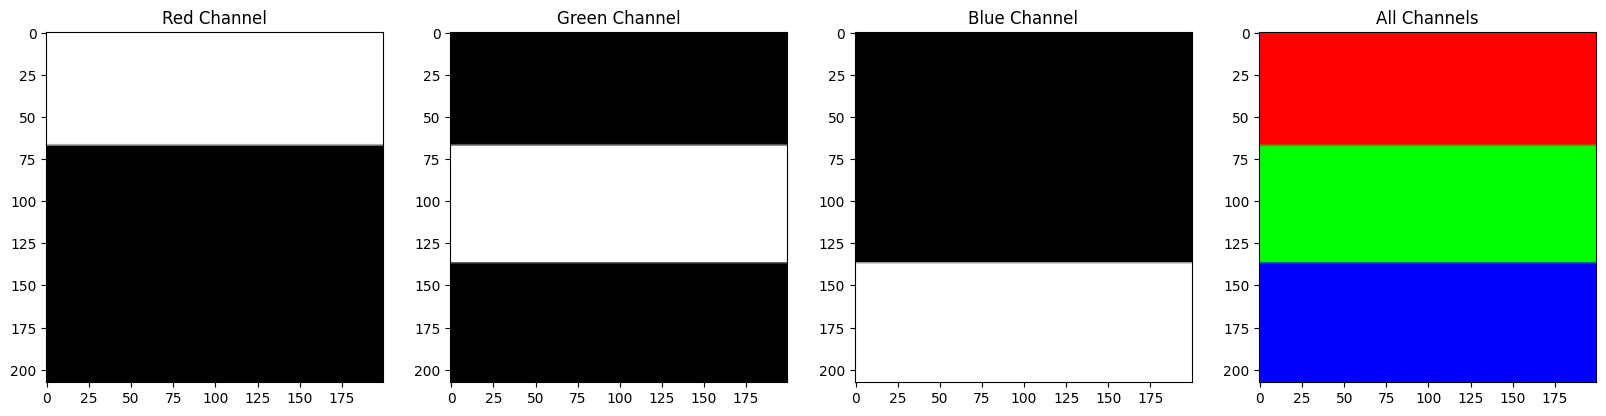

In [2]:
# Split the image into B, G, R components
img = cv2.imread("./images/color.png")
b, g, r = cv2.split(img)

# Show the channels
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(r, cmap="gray")
plt.title("Red Channel")

plt.subplot(142)
plt.imshow(g, cmap="gray")
plt.title("Green Channel")

plt.subplot(143)
plt.imshow(b, cmap="gray")
plt.title("Blue Channel")

# Show the original image
plt.subplot(144)
plt.imshow(img[..., ::-1])
plt.title("All Channels")

Text(0.5, 1.0, 'All Channels')

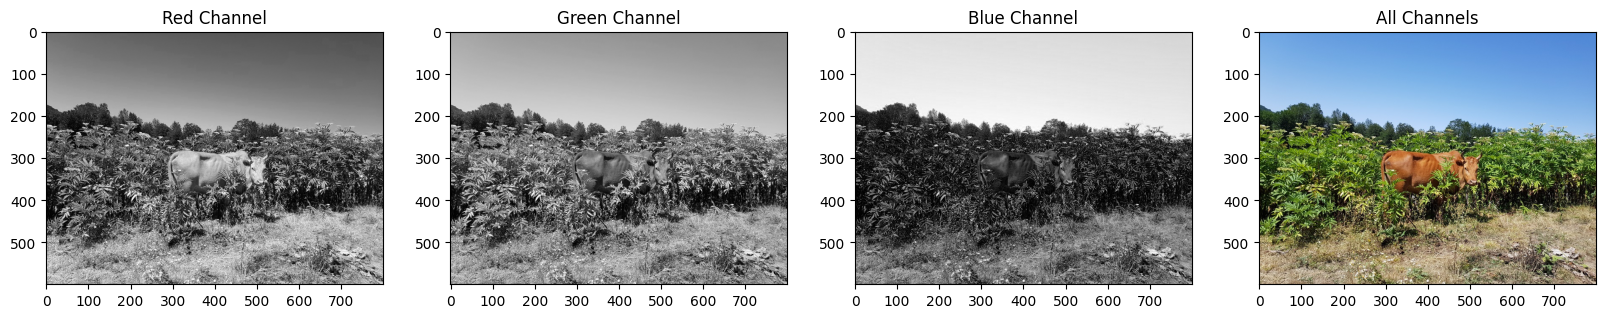

In [3]:
# Split the image into B, G, R components
img = cv2.imread("./images/input.jpg")
b, g, r = cv2.split(img)

# Show the channels
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(r, cmap="gray")
plt.title("Red Channel")

plt.subplot(142)
plt.imshow(g, cmap="gray")
plt.title("Green Channel")

plt.subplot(143)
plt.imshow(b, cmap="gray")
plt.title("Blue Channel")

# Show the original image
plt.subplot(144)
plt.imshow(img[..., ::-1])
plt.title("All Channels")

Text(0.5, 1.0, 'Merged output')

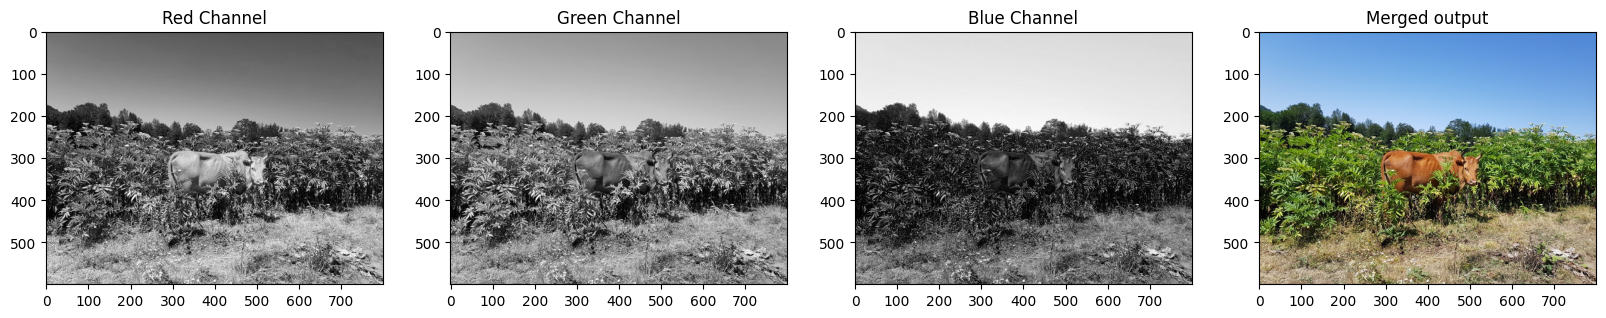

In [4]:
# Let's re-make the original image
merged = cv2.merge([b, g, r])

# Show the channels
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(r, cmap="gray")
plt.title("Red Channel")

plt.subplot(142)
plt.imshow(g, cmap="gray")
plt.title("Green Channel")

plt.subplot(143)
plt.imshow(b, cmap="gray")
plt.title("Blue Channel")

# Show the merged image
plt.subplot(144)
plt.imshow(merged[..., ::-1])
plt.title("Merged output")

Text(0.5, 1.0, 'Blue')

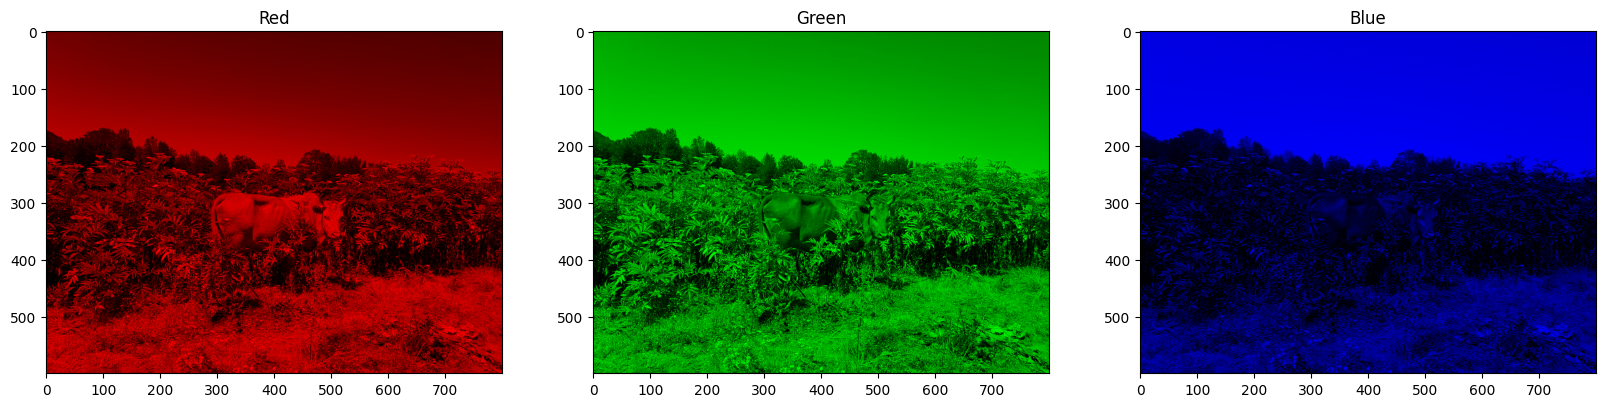

In [7]:
zeros = np.zeros_like(r, 'uint8')

red = cv2.merge([zeros, zeros, r])
green = cv2.merge([zeros, g, zeros])
blue = cv2.merge([b, zeros, zeros])

# Show the channels
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.imshow(red[..., ::-1], cmap="gray")
plt.title("Red")

plt.subplot(132)
plt.imshow(green[..., ::-1], cmap="gray")
plt.title("Green")

plt.subplot(133)
plt.imshow(blue[..., ::-1], cmap="gray")
plt.title("Blue")

Text(0.5, 1.0, 'Modified image')

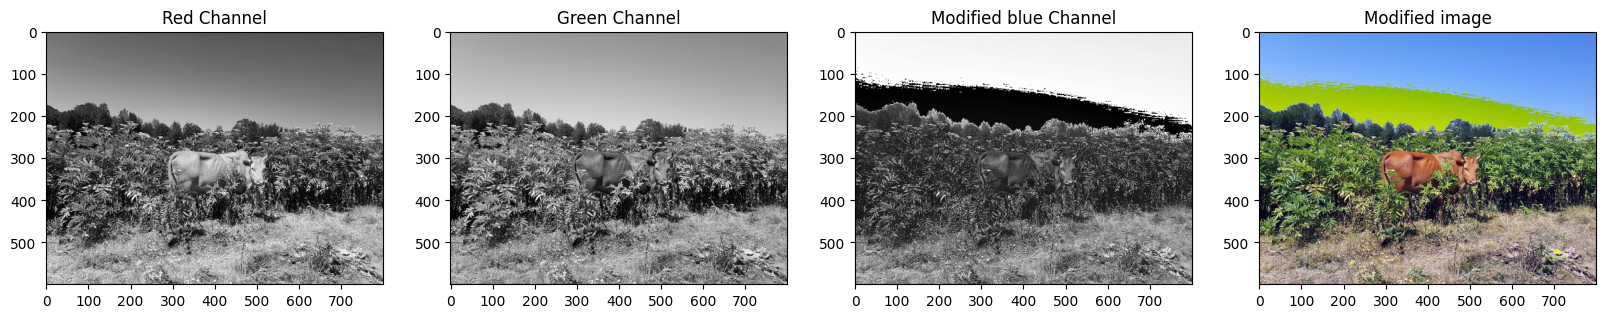

In [22]:
# Split the image into the B, G, R components
img = cv2.imread("./images/input.jpg")
b, g, r = cv2.split(img)

# Let's re-make the original image
modified_b = b + 20
merged = cv2.merge([modified_b, g, r])

# Show the channels
plt.figure(figsize=(20, 8))

plt.subplot(141)
plt.imshow(r, cmap="gray")
plt.title("Red Channel")

plt.subplot(142)
plt.imshow(g, cmap="gray")
plt.title("Green Channel")

plt.subplot(143)
plt.imshow(modified_b, cmap="gray")
plt.title("Modified blue Channel")

# Show the original image
plt.subplot(144)
plt.imshow(merged[..., ::-1])
plt.title("Modified image")

In [ ]:
# 255 --> 1111 1111
# 255 + 1 --> 001 0000 0000 = 0000 0000

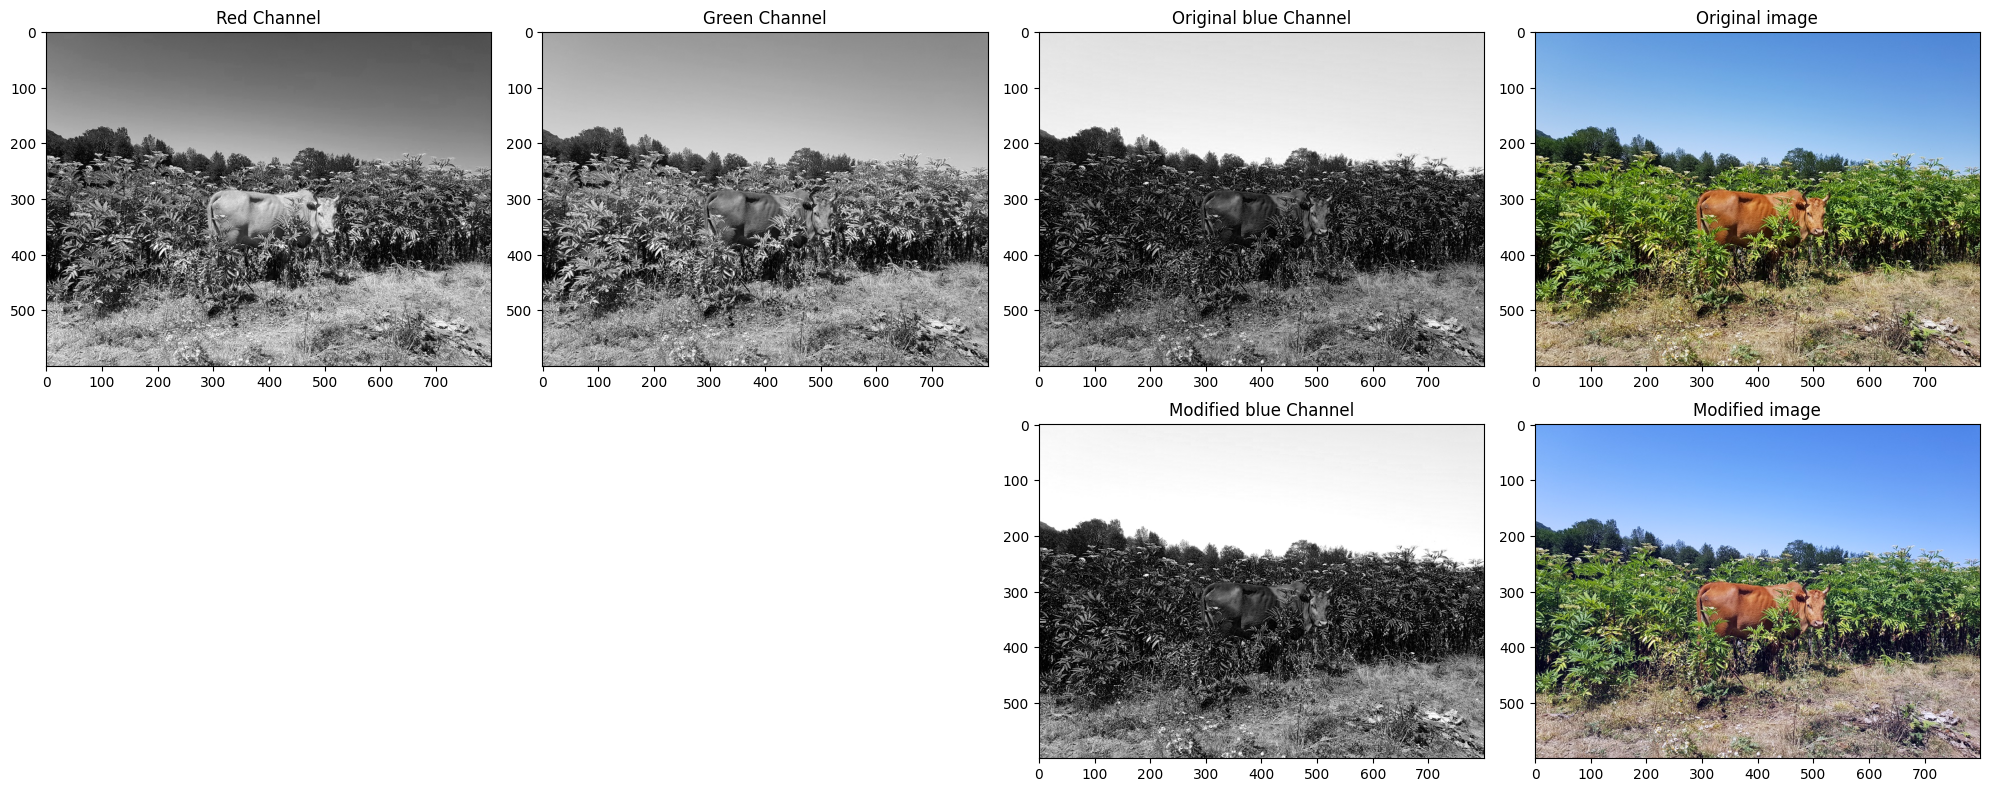

In [21]:
# Let's re-make the original image
modified_b = b.astype('int16') + 20
modified_b = np.minimum(modified_b, 255)
modified_b = modified_b.astype('uint8')

merged = cv2.merge([modified_b, g, r])

# Show the channels
plt.figure(figsize=(20, 8))

plt.subplot(241)
plt.imshow(r, cmap="gray")
plt.title("Red Channel")

plt.subplot(242)
plt.imshow(g, cmap="gray")
plt.title("Green Channel")

plt.subplot(243)
plt.imshow(b, cmap="gray")
plt.title("Original blue Channel")

plt.subplot(244)
plt.imshow(img[..., ::-1])
plt.title("Original image")

# Show the modified channel and image
plt.subplot(247)
plt.imshow(modified_b, cmap='gray')
plt.title("Modified blue Channel")

plt.subplot(248)
plt.imshow(merged[..., ::-1])
plt.title("Modified image")

plt.tight_layout()

In [23]:
np.all(modified_b == cv2.add(b, 20))

np.False_

## HSV

- Hue - Color Value (0 - 179)
- Saturation - Vibrancy of color (0 - 255)
- Value - Brightness of intensity (0 - 255)

![HSV](./images/HSV_color_solid_cylinder.png)

In [25]:
# H: 0 - 180, S: 0 - 255, V: 0 - 255

img = cv2.imread('./images/input.jpg')
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('HSV image', hsv_image)
cv2.imshow('Hue channel', hsv_image[:, :, 0])
cv2.imshow('Saturation channel', hsv_image[:, :, 1])
cv2.imshow('Value channel', hsv_image[:, :, 2])

cv2.waitKey()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Value Channel')

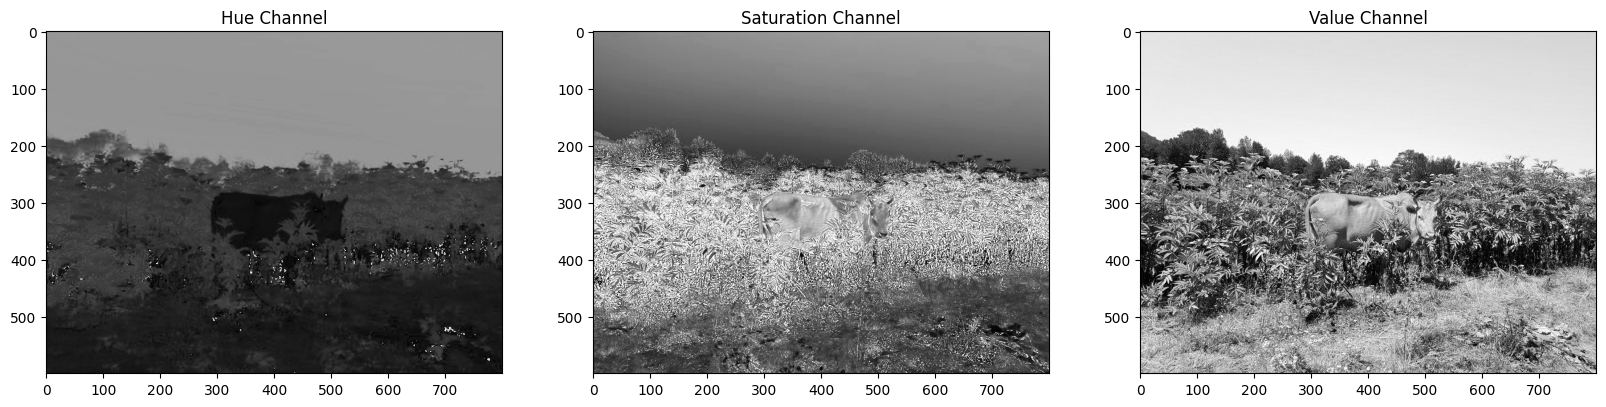

In [27]:
# Show the channels
plt.figure(figsize=[20, 8])

plt.subplot(131)
plt.imshow(hsv_image[:, :, 0], cmap='gray')
plt.title("Hue Channel")

plt.subplot(132)
plt.imshow(hsv_image[:, :, 1], cmap='gray')
plt.title("Saturation Channel")

plt.subplot(133)
plt.imshow(hsv_image[:, :, 2], cmap='gray')
plt.title("Value Channel")

Text(0.5, 1.0, 'original image')

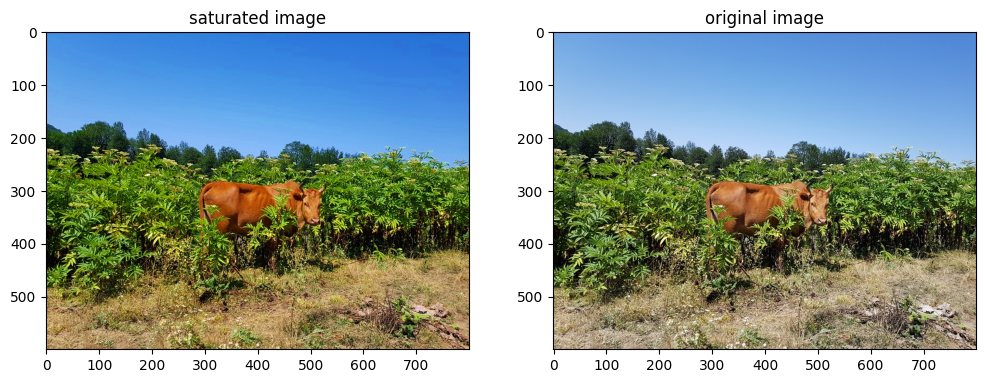

In [34]:
saturated_image = cv2.merge([hsv_image[:, :, 0], cv2.add(
    hsv_image[:, :, 1], 50), hsv_image[:, :, 2]])
saturated_image = cv2.cvtColor(saturated_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[12, 5])

plt.subplot(121)
plt.imshow(saturated_image[..., ::-1])
plt.title('saturated image')

plt.subplot(122)
plt.imshow(img[..., ::-1])
plt.title('original image')

Text(0.5, 1.0, 'original image')

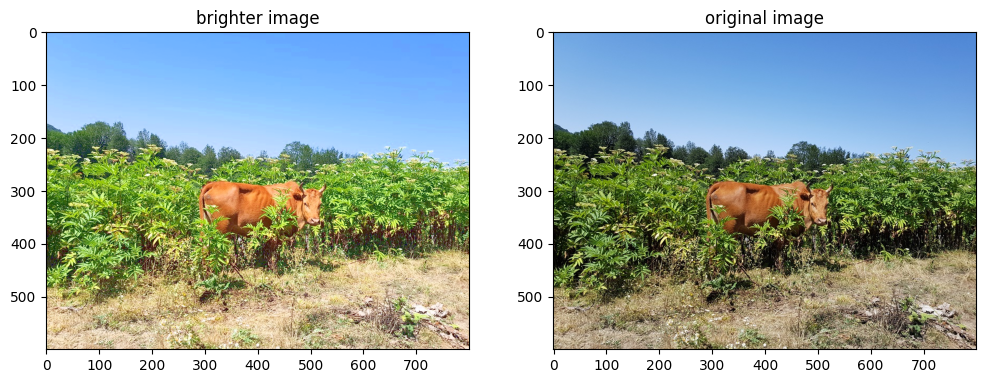

In [35]:
brighter_image = cv2.merge([hsv_image[:, :, 0], hsv_image[:, :, 1], cv2.add(
    hsv_image[:, :, 2], 50)])
brighter_image = cv2.cvtColor(brighter_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[12, 5])

plt.subplot(121)
plt.imshow(brighter_image[..., ::-1])
plt.title('brighter image')

plt.subplot(122)
plt.imshow(img[..., ::-1])
plt.title('original image')

***[Color Space Conversions](https://docs.opencv.org/4.6.0/d8/d01/group__imgproc__color__conversions.html)***